In [203]:
import pandas as pd

train_data = pd.read_csv('../CSV/with_Background/5_label/HSV/HSV_Training.csv')
train_data

,H,S,V,label
0,81.974577,102.584973,168.376517,1
1,54.737978,91.916578,146.841428,1
2,76.855214,96.200118,160.534384,1
3,76.855214,96.200118,160.534384,1
4,33.478151,103.161639,147.159878,1
...,...,...,...,...
195,83.991077,82.608059,155.094844,5
196,83.991077,82.608059,155.094844,5
197,86.196517,71.111233,170.544318,5
198,86.196517,71.111233,170.544318,5


In [204]:
test_data = pd.read_csv('../CSV/with_Background/5_label/HSV/HSV_Testing.csv')
test_data

,H,S,V,label
0,75.729207,143.896614,171.584803,1
1,82.076242,92.058603,188.019142,1
2,81.025352,115.197752,175.925893,1
3,83.869878,121.008110,158.315995,1
4,96.222900,112.547039,179.969918,2
5,89.591180,122.983177,182.470417,2
6,96.042360,103.192065,178.292771,2
7,85.100154,120.321136,188.340366,2
8,84.156720,100.012220,166.383919,3
9,92.305871,84.218896,148.585724,3


In [205]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

In [206]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [207]:
X_test = test_data.drop('label', axis=1)
y_true = test_data['label']

In [208]:
y_pred = model.predict(X_test)
y_pred

array([1, 3, 5, 4, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 3, 3, 3, 5, 5, 5],
      dtype=int64)

In [209]:
X_test['label'] = y_pred
X_test

,H,S,V,label
0,75.729207,143.896614,171.584803,1
1,82.076242,92.058603,188.019142,3
2,81.025352,115.197752,175.925893,5
3,83.869878,121.008110,158.315995,4
4,96.222900,112.547039,179.969918,2
5,89.591180,122.983177,182.470417,2
6,96.042360,103.192065,178.292771,2
7,85.100154,120.321136,188.340366,2
8,84.156720,100.012220,166.383919,3
9,92.305871,84.218896,148.585724,3


In [210]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.25      0.40         4
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         4
           4       0.67      0.50      0.57         4
           5       0.75      0.75      0.75         4

    accuracy                           0.70        20
   macro avg       0.78      0.70      0.68        20
weighted avg       0.78      0.70      0.68        20



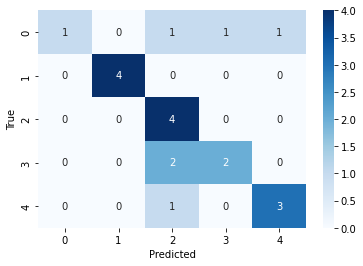

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [212]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


In [213]:
# import joblib

# # simpan model dalam file .pkl
# joblib.dump(model, '../Model/NB_Model_Fix.pkl')